In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import important packages and libraries
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
# import splitfolders

In [ ]:
# Data preparation
# ignore this since dataset has already been split
# splitfolders.ratio("Male and Female face dataset", output="gender_dataset", seed=1337, ratio=(0.8, 0, 0.2), group_prefix=None, move=False)

In [ ]:
# construct  instances of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale=1
)
test_datagen = ImageDataGenerator(
    rescale=1
)

In [ ]:
model = keras.Sequential()

# Defining CNN Layers
model.add(layers.Conv2D(60, (4,4), activation='relu', input_shape=(224,224,3))) # Convolutional Layer
model.add(layers.MaxPooling2D((3,3))) # Pooling Layer

model.add(layers.Conv2D(90, (4,4), activation='relu'))
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(120, (4,4), activation='relu'))
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(200, (4,4), activation='relu'))
model.add(layers.MaxPooling2D((3,3)))


model.add(layers.Flatten()) # converting data into a 1D array to be an input for fully connected layer

# Fully Connected Layer
model.add(layers.Dense(670, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
# prepare iterators
training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/gender_and_blur/gender_rev2/train', batch_size=64, target_size=(224,224))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/gender_and_blur/gender_rev2/test', batch_size=64, target_size=(224,224))

Found 3491 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# Compile and Fit the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(training_iterator, validation_data=testing_iterator, epochs=10)

Epoch 1/10
55/55 [==============================] - 450s 8s/step - loss: 3.2408 - accuracy: 0.5394 - val_loss: 0.6883 - val_accuracy: 0.5100
Epoch 2/10
55/55 [==============================] - 445s 8s/step - loss: 0.6601 - accuracy: 0.5978 - val_loss: 0.5343 - val_accuracy: 0.7850
Epoch 3/10
55/55 [==============================] - 442s 8s/step - loss: 0.4852 - accuracy: 0.7754 - val_loss: 0.2959 - val_accuracy: 0.8900
Epoch 4/10
55/55 [==============================] - 447s 8s/step - loss: 0.3739 - accuracy: 0.8402 - val_loss: 0.4029 - val_accuracy: 0.8250
Epoch 5/10
55/55 [==============================] - 442s 8s/step - loss: 0.2882 - accuracy: 0.8826 - val_loss: 0.2040 - val_accuracy: 0.9050
Epoch 6/10
55/55 [==============================] - 446s 8s/step - loss: 0.2612 - accuracy: 0.8963 - val_loss: 0.1612 - val_accuracy: 0.9500
Epoch 7/10
55/55 [==============================] - 443s 8s/step - loss: 0.1865 - accuracy: 0.9249 - val_loss: 0.1588 - val_accuracy: 0.9300
Epoch 8/10
55

In [ ]:
model.evaluate(training_iterator)

55/55 [==============================] - 120s 2s/step - loss: 0.1185 - accuracy: 0.9559


[0.11853834241628647, 0.9558865427970886]

In [ ]:
model.evaluate(testing_iterator)

4/4 [==============================] - 7s 2s/step - loss: 0.2111 - accuracy: 0.9250


[0.21113914251327515, 0.925000011920929]

In [ ]:
labels = training_iterator.class_indices
print(labels)

{'female': 0, 'male': 1}


In [ ]:
model.save('gender_face_model.h5')

Test 1 with first image

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path_to_img = "/content/drive/MyDrive/Colab Notebooks/gender_and_blur/group_stock_photo.jpg"
image = cv2.imread(path_to_img) # store image into variable
img_2 = image.copy()
img_3 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # create grayscale version of original image

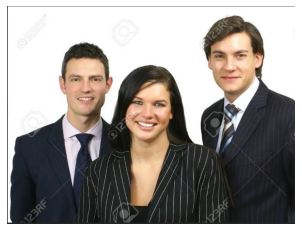

In [ ]:
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_3)

In [ ]:
# create and initialize cascade, loads face cascade into memory
cas_path = '/content/drive/MyDrive/Colab Notebooks/gender_and_blur/haarcascade_frontalface_default.xml' # initialize cascade retrieved from xml file
face_cascade = cv2.CascadeClassifier(cas_path)

In [ ]:
# for facial detection
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.35, # takes into account objects that differ in distance to the camera
    minNeighbors = 5,
    minSize = (30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [ ]:
def determine_gender(img_arr):
    img = img_arr
    img = img.reshape(1, 224, 224, 3)
    l_model = load_model('/content/drive/MyDrive/Colab Notebooks/gender_and_blur/gender_face_model.h5') # load saved model file
    result = l_model.predict(img)
    print("Model result: ", result)
    result = np.argmax(result)
    print("Model result: ", result)

    return result

In [ ]:
print('Found {0} faces!'.format(len(faces)))

for(x, y, w, h) in  faces:
    x2 = x+w
    y2 = y+h
    cv2.rectangle(img_2, (x, y), (x2, y2), (0, 0, 0), 2) # draws a rectangle around detected face
    crop = image.copy()
    tp = y+2 # top most point of height in the box
    bp = y2-2 # bottom most point in the box
    lp = x+2 # left most point in the box
    rp = x2-2 # right most point in the box
    crop = crop[tp:bp, lp:rp] # crop section of image that contains detected face
    resized_img = cv2.resize(crop, (224,224))
    # img_3 = resized_img
    array_img = img_to_array(resized_img)# converts image to array
    g_result = determine_gender(array_img) #passes array to function that will pass the array into a model
    gender_label = "_"
    g_color = (255,255,255)
    if g_result == 0:
        gender_label = "Female"
        g_color = (255, 0, 0)
    elif g_result == 1:
        gender_label = "Male"
        g_color = (0, 0, 255)
    img_2 = cv2.putText(img_2, gender_label, (x, y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, g_color, 2, cv2.LINE_AA) # adds gender label above boxes of detected faces
    img_2[tp:bp, lp:rp] = cv2.blur(crop, (30,30), cv2.BORDER_DEFAULT) # function to blur the detected faces 
    



Found 3 faces!
1/1 [==============================] - 0s 470ms/step
Model result:  [[0.12780543 0.8721946 ]]
Model result:  1
1/1 [==============================] - 0s 140ms/step
Model result:  [[0.15016456 0.8498354 ]]
Model result:  1
1/1 [==============================] - 0s 145ms/step
Model result:  [[0.6174731  0.38252687]]
Model result:  0


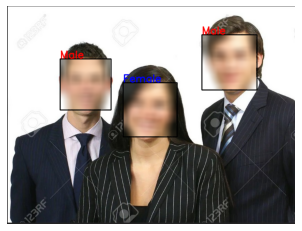

In [ ]:
# display final image
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
# plt.imsave(fname = "first_image_result.jpg", arr=img_2, dpi= 300)

plt.axis('off')
plt.imshow(img_2)

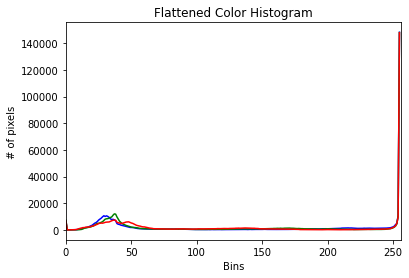

In [ ]:
color = ('b', 'g', 'r') # define tuple that contains the colors to plot the histgrams with
plt.figure()
# plots histogram for each color: blue, green and red
for i, col in enumerate(color):
    hist = cv2.calcHist([img_2], [i], None, [256], [0, 256]) # calculate histogram of img_cartoon
    # [img_cartoon] = the image itself
    # [i] = list of channels
    # None = mask set to None, only used if there are masked pixels
    # [256] = size of histogram, number of bins
    # [0, 256] = ranges
    # in ranges: 0 = Output of histogram
    # in ranges: 256 = accumulation flag,  allows to create histogram from sets of arrays
    plt.plot(hist, color = col) # creates graph using data from the hist variable
    plt.xlim([0, 256])
plt.title('Flattened Color Histogram') # title for graph
plt.ylabel('# of pixels') # Label for y variables
plt.xlabel('Bins') # Label for x variables
plt.show() # dispaly graph

Test 2 with second Image

In [ ]:
path_to_img = "/content/drive/MyDrive/Colab Notebooks/gender_and_blur/man_woman.jpg"
image = cv2.imread(path_to_img) # store image into variable
img_2 = image.copy()
img_3 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # create grayscale version of original image

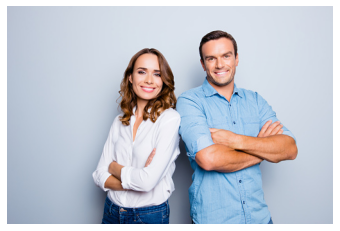

In [ ]:
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_3)

In [ ]:
# for facial detection
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.35,
    minNeighbors = 5,
    minSize = (30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [ ]:
print('Found {0} faces!'.format(len(faces)))

for(x, y, w, h) in  faces:
    x2 = x+w
    y2 = y+h
    cv2.rectangle(img_2, (x, y), (x2, y2), (0, 0, 0), 2) # draws a rectangle around detected face
    crop = image.copy()
    tp = y+2 # top most point of height in the box
    bp = y2-2 # bottom most point in the box
    lp = x+2 # left most point in the box
    rp = x2-2 # right most point in the box
    crop = crop[tp:bp, lp:rp] # crop section of image that contains detected face
    resized_img = cv2.resize(crop, (224,224))
    # img_3 = resized_img
    array_img = img_to_array(resized_img)# converts image to array
    g_result = determine_gender(array_img) #passes array to function that will pass the array into a model
    gender_label = "_"
    g_color = (255,255,255)
    if g_result == 0:
        gender_label = "Female"
        g_color = (255, 0, 0)
    elif g_result == 1:
        gender_label = "Male"
        g_color = (0, 0, 255)
    img_2 = cv2.putText(img_2, gender_label, (x, y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, g_color, 2, cv2.LINE_AA) # adds gender label above boxes of detected faces
    img_2[tp:bp, lp:rp] = cv2.blur(crop, (30,30), cv2.BORDER_DEFAULT) # function to blur the detected faces 

Found 2 faces!
1/1 [==============================] - 0s 86ms/step
Model result:  [[0.14296181 0.85703814]]
Model result:  1


1/1 [==============================] - 0s 91ms/step
Model result:  [[0.8672419 0.1327581]]
Model result:  0


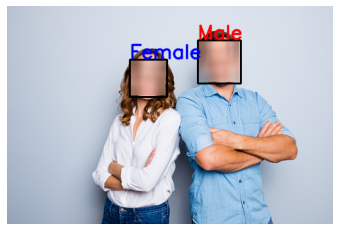

In [ ]:
# display final image
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
# plt.imsave(fname = "second_image_result.jpg", arr=img_2, dpi= 300)
plt.axis('off')
plt.imshow(img_2)

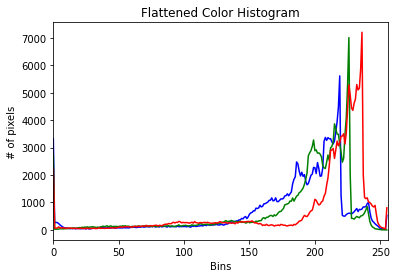

In [ ]:
color = ('b', 'g', 'r') # define tuple that contains the colors to plot the histgrams with
plt.figure()
# plots histogram for each color: blue, green and red
for i, col in enumerate(color):
    hist = cv2.calcHist([img_2], [i], None, [256], [0, 256]) # calculate histogram of img_cartoon
    # [img_cartoon] = the image itself
    # [i] = list of channels
    # None = mask set to None, only used if there are masked pixels
    # [256] = size of histogram, number of bins
    # [0, 256] = ranges
    # in ranges: 0 = Output of histogram
    # in ranges: 256 = accumulation flag,  allows to create histogram from sets of arrays
    plt.plot(hist, color = col) # creates graph using data from the hist variable
    plt.xlim([0, 256])
plt.title('Flattened Color Histogram') # title for graph
plt.ylabel('# of pixels') # Label for y variables
plt.xlabel('Bins') # Label for x variables
plt.show() # dispaly graph